In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
bgr = cv2.imread ("patron.jpeg")
im = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

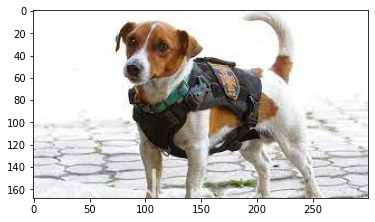

In [3]:
plt.imshow(im)
plt.show()

In [4]:
h,w,c = im.shape
h,w,c

(168, 300, 3)

In [5]:
pixels = np.reshape(im, newshape=(h*w, c)).astype('int')
pixels

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [210, 212, 209],
       [216, 218, 215],
       [223, 225, 222]])

In [6]:
len(set( tuple(c) for c in pixels))

16443

In [7]:
reduced = set([ tuple(c) for c in pixels])
reduced = [ (r, g, b) for r, g, b in reduced 
           if abs(r - g) > 80 or abs(r - b) > 80 or abs(g - b) > 80 or r + g + b < 60 or r + g + b > 500]

In [8]:
K = 9
kmeans = KMeans(n_clusters=K).fit(reduced)

In [9]:
colors = (kmeans.cluster_centers_).astype('uint8')
colors

array([[124,  69,  31],
       [214, 211, 206],
       [ 16,  13,   8],
       [246, 245, 243],
       [156, 100,  53],
       [196, 193, 187],
       [229, 228, 226],
       [183, 175, 166],
       [181, 127,  82]], dtype=uint8)

In [10]:
new_im = np.zeros_like(pixels)
labels = kmeans.predict(pixels)
for i in range(len(pixels)):
    k = labels[i]
    new_im[i] = colors[k]

In [11]:
new_im = np.reshape(new_im, newshape=(h, w, c)).astype('uint8')

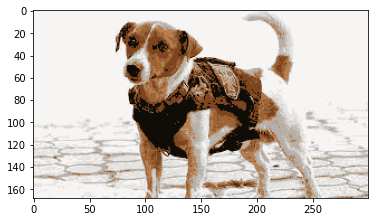

In [12]:
plt.imshow(new_im)
plt.show()

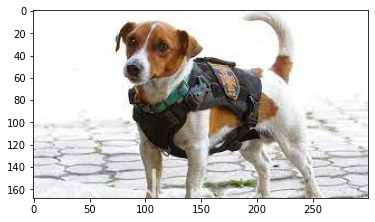

In [13]:
plt.imshow(im)